In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Import các thư viện cần thiết
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE

# Đọc dữ liệu từ file CSV
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/clean_data.csv', sep=',', encoding='latin1')

# In tên cột và 5 dòng đầu để kiểm tra
print("Tên các cột trong file:", df.columns.tolist())
print("5 dòng đầu của dữ liệu:\n", df.head())




Tên các cột trong file: ['Unnamed: 0', 'brand', 'ram', 'storage', 'battery', 'charging', 'price']
5 dòng đầu của dữ liệu:
    Unnamed: 0    brand  ram  storage  battery  charging       price
0           0  Samsung  6.0    128.0   5000.0      25.0   6590000.0
1           1   realme  6.0    128.0   5600.0      45.0   4690000.0
2           2   iPhone  8.0    128.0   4500.0      20.0  16590000.0
3           3   iPhone  8.0    256.0   4500.0      20.0  19490000.0
4           4   iPhone  8.0    512.0   4500.0      20.0  24590000.0


1. Ma trận tương quan

Biểu đồ ma trận tương quan giúp hiển thị mối quan hệ giữa các biến trong dữ liệu, với giá trị từ -1 đến 1, cho biết mức độ tương quan giữa hai biến. Màu sắc thể hiện mức độ mạnh yếu của tương quan: màu đỏ đậm là tương quan dương mạnh, màu xanh đậm là tương quan âm mạnh. Biểu đồ giúp phát hiện mối quan hệ tuyến tính giữa các biến và có thể giúp giảm số lượng biến trong mô hình. Nó cũng hỗ trợ nhận diện các yếu tố ảnh hưởng lẫn nhau.

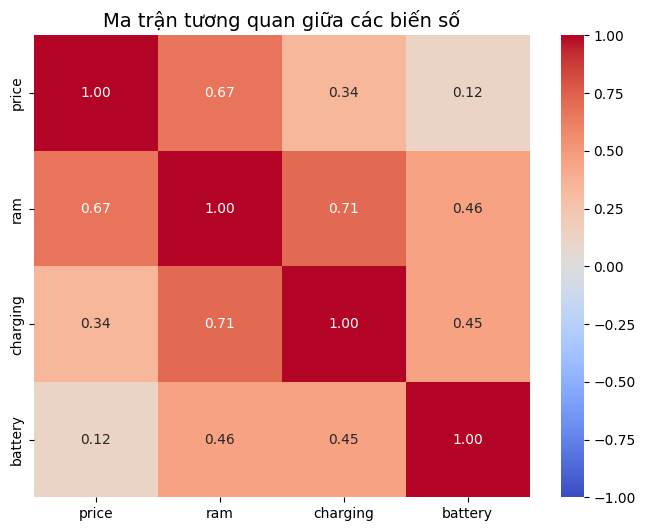

In [ ]:
# 1. Correlation Heatmap (Ma trận tương quan giữa các biến số)
plt.figure(figsize=(8, 6))

# Tính ma trận tương quan
corr = df[['price', 'ram', 'charging', 'battery']].corr()

# Vẽ heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt=".2f")

plt.title('Ma trận tương quan giữa các biến số', fontsize=14)
plt.show()


2. Biểu đồ hồi quy tuyến tính

Biểu đồ hồi quy tuyến tính (regression plot) hiển thị mối quan hệ giữa hai biến số, thường là biến độc lập (x) và biến phụ thuộc (y). Đặc điểm của biểu đồ này:

Dữ liệu thực tế: Các điểm dữ liệu được hiển thị dưới dạng các chấm trên biểu đồ.

Đường hồi quy: Đường thẳng đỏ hoặc đường xu hướng được vẽ để thể hiện mối quan hệ tuyến tính giữa hai biến.

Mức độ mối quan hệ: Đường hồi quy giúp dễ dàng quan sát được độ dốc và hướng của mối quan hệ, đồng thời có thể chỉ ra mức độ mạnh yếu của sự tương quan (thông qua sự phân tán của các điểm dữ liệu quanh đường xu hướng).

Tính chất: Cung cấp thông tin về mức độ phù hợp của mô hình hồi quy tuyến tính đối với dữ liệu.

Biểu đồ này rất hữu ích để dự đoán giá trị của biến phụ thuộc dựa trên giá trị của biến độc lập.








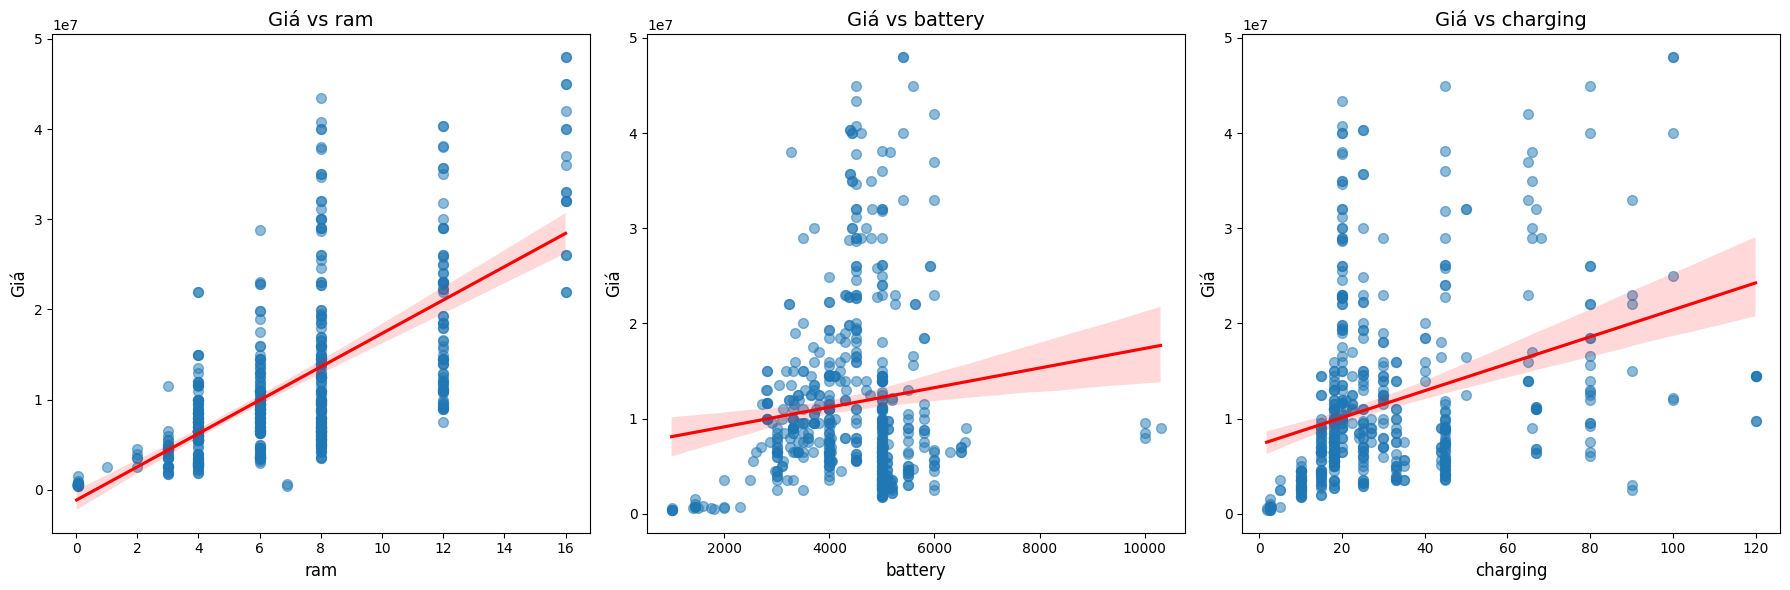

In [ ]:
# 2. Vẽ biểu đồ hồi quy tuyến tính giữa giá (price) và các biến số khác
vars_to_plot_vs_price = ["ram", "battery", "charging"]
n_rows, n_cols = 1, len(vars_to_plot_vs_price)  # Điều chỉnh số cột theo số lượng biến
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(18, 6))
axes = axes.flatten()

for i, var in enumerate(vars_to_plot_vs_price):
    if var in df.columns:  # Kiểm tra cột có tồn tại không
        sns.regplot(x=var, y="price", data=df,
                    scatter_kws={'alpha': 0.5, 's': 50},  # Tăng kích thước điểm
                    line_kws={'color': 'red'},
                    ax=axes[i])
        axes[i].set_title(f'Giá vs {var}', fontsize=14)
        axes[i].set_xlabel(var, fontsize=12)
        axes[i].set_ylabel('Giá', fontsize=12)
    else:
        axes[i].set_title(f'{var} - Không tồn tại')
        axes[i].axis('off')  # Ẩn subplot nếu cột không tồn tại

plt.tight_layout()
plt.show()


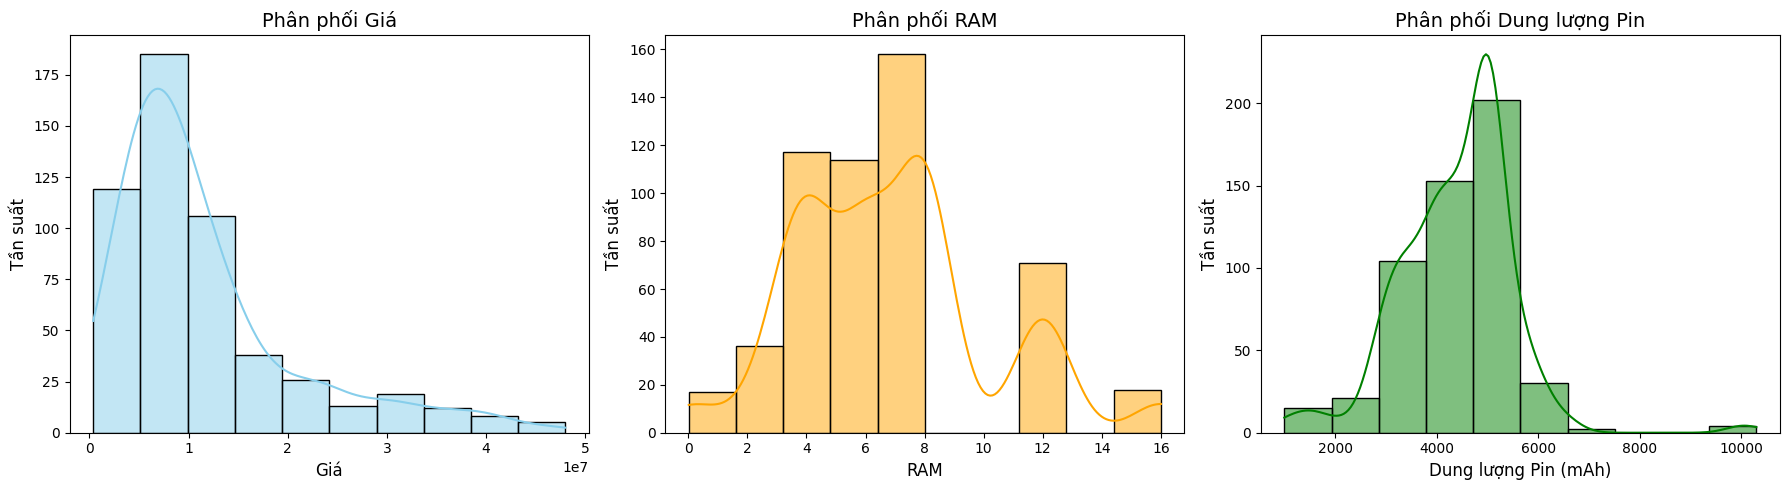

In [ ]:
# 3. Vẽ các biểu đồ phân phối cho các biến 'price', 'ram', 'battery'
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Biểu đồ phân phối cho giá (price)
sns.histplot(df["price"], kde=True, bins=10, ax=axes[0], color='skyblue')
axes[0].set_title("Phân phối Giá", fontsize=14)
axes[0].set_xlabel('Giá', fontsize=12)
axes[0].set_ylabel('Tần suất', fontsize=12)

# Biểu đồ phân phối cho RAM
sns.histplot(df["ram"], kde=True, bins=10, ax=axes[1], color='orange')
axes[1].set_title("Phân phối RAM", fontsize=14)
axes[1].set_xlabel('RAM', fontsize=12)
axes[1].set_ylabel('Tần suất', fontsize=12)

# Biểu đồ phân phối cho Dung lượng Pin (battery)
sns.histplot(df["battery"], kde=True, bins=10, ax=axes[2], color='green')
axes[2].set_title("Phân phối Dung lượng Pin", fontsize=14)
axes[2].set_xlabel('Dung lượng Pin (mAh)', fontsize=12)
axes[2].set_ylabel('Tần suất', fontsize=12)

# Hiển thị các biểu đồ
plt.tight_layout()  # Đảm bảo không có chồng chéo giữa các biểu đồ
plt.show()
